In [14]:
import mlflow 
import mlflow.sklearn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import  Dense, Embedding, LSTM, Bidirectional

Importing the dataset

Loading IMDB standard dataset using the Keras dataset class.

In [15]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

Feature Extraction

Since we have text data in x_train and x_test of having an uneven length. Our goal is to convert this text data into a numerical form in order to feed it into the model.

Make the length of texts equal using padding.

We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [16]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [17]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [18]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

Designing the Bi-directional LSTM 


You can either use Sequential or Functional API to create the model. here we are using Sequential API.



In [19]:
n_unique_words= 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mlflow.tensorflow.autolog()

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.

The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.

After the Embedding layer, we are adding Bi-directional LSTM units.
Using sigmoid activation and then compiling the model

Training the model

We have prepared our dataset and model not calling the fit method to train our model.

In [24]:
batch_size= 250

history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=3,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

2022/06/16 21:22:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1c4ac1cd5fd3429e88436534dec8cdd6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/3
100/100 [==============================] - 201s 2s/step - loss: 0.1118 - accuracy: 0.9624 - val_loss: 0.3971 - val_accuracy: 0.8600
Epoch 2/3
100/100 [==============================] - 201s 2s/step - loss: 0.0890 - accuracy: 0.9707 - val_loss: 0.4005 - val_accuracy: 0.8508
Epoch 3/3
100/100 [==============================] - 196s 2s/step - loss: 0.1004 - accuracy: 0.9662 - val_loss: 0.4771 - val_accuracy: 0.8530


INFO:tensorflow:Assets written to: C:\Users\SAHAY_~1\AppData\Local\Temp\tmpjarabo8s\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\SAHAY_~1\AppData\Local\Temp\tmpjarabo8s\model\data\model\assets
2022/06/16 21:33:33 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: could not create '.\mlruns\0\1c4ac1cd5fd3429e88436534dec8cdd6\artifacts\tensorboard_logs\train\events.out.tfevents.1655394774.LAPTOP-8TU7UG9P.148.5.v2': No such file or directory


[0.11177278310060501, 0.08896719664335251, 0.10042901337146759]
[0.9623600244522095, 0.9707199931144714, 0.966159999370575]


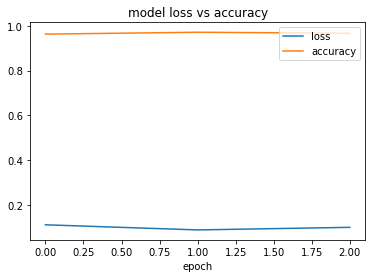

In [25]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

As you can see the accuracy line is nearly touching the one and loss is minimum very close to zero. However, you can go ahead and draw some predictions using the model.

In [ ]:
!mlflow ui 